In [1]:
pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
from google.colab import files
uploaded = files.upload()


Saving gas_turbines.csv to gas_turbines.csv


In [27]:
data = pd.read_csv("gas_turbines.csv")

In [28]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [188]:
data.isna().value_counts()
#check the null values

AT     AP     AH     AFDP   GTEP   TIT    TAT    TEY    CDP    CO     NOX  
False  False  False  False  False  False  False  False  False  False  False    15039
dtype: int64

In [189]:
data.duplicated().unique()
# checking the duplicates data

array([False])

In [32]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<Axes: >

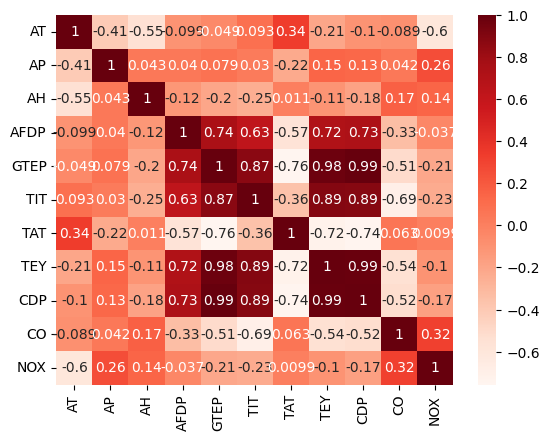

In [190]:
sns.heatmap(data.corr(),annot=True,cmap="Reds")
# corelation matrix of features

Preparing Data for Model

In [ ]:
x = data.drop("TEY",axis=1)

In [35]:
x.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [36]:
x.shape

(15039, 10)

In [37]:
y=data["TEY"]

In [38]:
y.shape

(15039,)

Preprocessing the Data

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [50]:
col = x.columns

In [51]:
x = scaler.fit_transform(x)

In [52]:
x = pd.DataFrame(x,columns=col)

In [53]:
x.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591


Create the Model

In [101]:
from sklearn.model_selection import train_test_split

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [209]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(30,input_dim=x.shape[1],activation="relu"))
model.add(tf.keras.layers.Dense(20,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(1))


In [210]:
model.compile(loss="mse",optimizer="rmsprop",metrics=["mse","mae"])

In [211]:
history =model.fit(x,y,validation_data=[x_test,y_test],epochs=150,batch_size=1000)

Epoch 1/150
16/16 [==============================] - 1s 16ms/step - loss: 18142.1074 - mse: 18142.1074 - mae: 133.7651 - val_loss: 17970.7715 - val_mse: 17970.7715 - val_mae: 133.1352
Epoch 2/150
16/16 [==============================] - 0s 5ms/step - loss: 17924.4688 - mse: 17924.4688 - mae: 132.9715 - val_loss: 17718.6934 - val_mse: 17718.6934 - val_mae: 132.2022
Epoch 3/150
16/16 [==============================] - 0s 5ms/step - loss: 17623.5098 - mse: 17623.5098 - mae: 131.8547 - val_loss: 17336.2930 - val_mse: 17336.2930 - val_mae: 130.7805
Epoch 4/150
16/16 [==============================] - 0s 6ms/step - loss: 17163.7734 - mse: 17163.7734 - mae: 130.1466 - val_loss: 16776.4434 - val_mse: 16776.4434 - val_mae: 128.6817
Epoch 5/150
16/16 [==============================] - 0s 6ms/step - loss: 16538.5020 - mse: 16538.5020 - mae: 127.7828 - val_loss: 16066.0254 - val_mse: 16066.0254 - val_mae: 125.9488
Epoch 6/150
16/16 [==============================] - 0s 6ms/step - loss: 15744.9209 

In [212]:
from tensorflow.keras.utils import plot_model

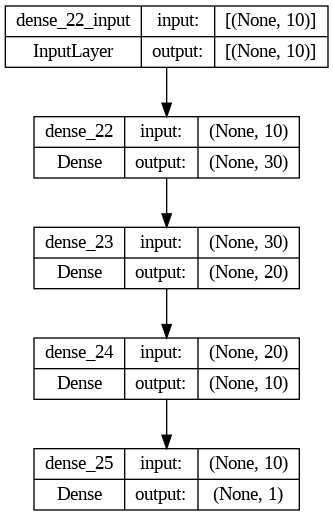

In [213]:
plot_model(model,to_file="model.png",show_shapes=True)

In [214]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [215]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 30)                330       
                                                                 
 dense_23 (Dense)            (None, 20)                620       
                                                                 
 dense_24 (Dense)            (None, 10)                210       
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1171 (4.57 KB)
Trainable params: 1171 (4.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [216]:
scores = model.evaluate(x,y)
#model Evaluvation

470/470 [==============================] - 1s 2ms/step - loss: 1.5930 - mse: 1.5930 - mae: 0.9427


In [217]:
print("Mean Absolute Error:",scores[2])

Mean Absolute Error: 0.9426667094230652


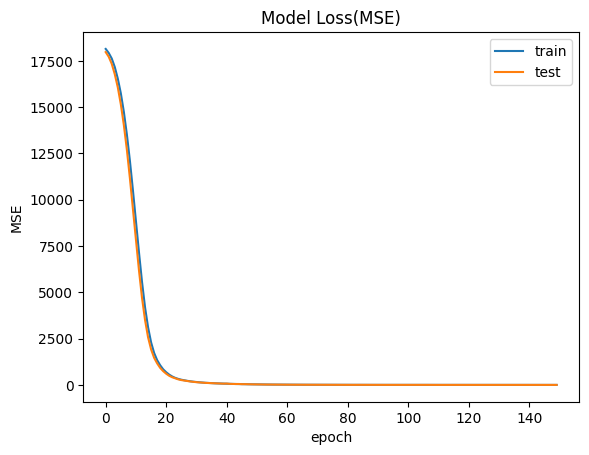

In [218]:
plt.title('Model Loss(MSE)')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('MSE')
plt.xlabel('epoch')

plt.legend()
plt.show()
# plot the loss of test and loss of train

In [219]:
pred = model.predict(x_test)

118/118 [==============================] - 0s 1ms/step


In [220]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(pred,y_test)

0.9497985425096875

In [221]:
mean_squared_error(pred,y_test)

1.6106369229751467

In [222]:
import math
rmse_value = math.sqrt(mean_squared_error(pred,y_test))

In [223]:
rmse_value

1.2691087120397317

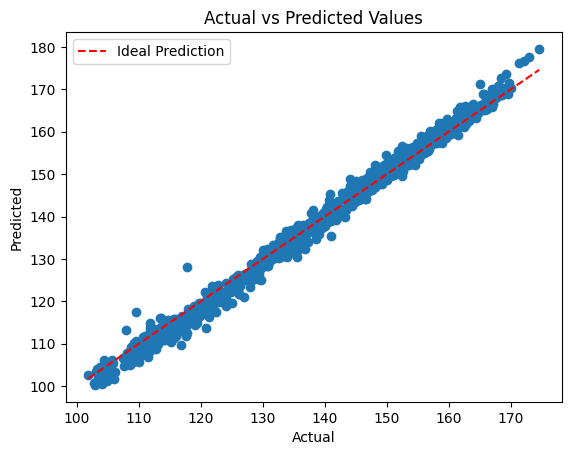

In [224]:
plt.scatter(y_test,pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()